# Get description of beer

In [7]:
import json
from bs4 import BeautifulSoup

In [1]:
import pandas as pd
import numpy as np
import re
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from tqdm import tqdm, tqdm_notebook

In [2]:
df_freq = pd.read_csv('freq_desc_words.csv').drop('Unnamed: 0', axis=1)
df_freq.most_freq = df_freq.most_freq.apply(literal_eval)
df_freq.head()

,name,id,most_freq
0,Ivanych Zhivoe Svetloe,301247,"[(bread, 2), (malty, 2), (clear, 2), (sweet, 2..."
1,Stara Praha Oldenburg Tiemnoye,334787,"[(fruity, 2), (dark, 1), (lemon, 1), (brown, 1..."
2,Stara Praha Oldenburg Svetloe,334785,"[(tart, 2), (hazy, 1), (lemon, 1), (grass, 1)]"
3,Stara Praha Oldenburg Jantarnoye,334786,"[(clear, 1), (lemon, 1), (light, 1), (spritzy,..."
4,Assir Lager (Svetloe),191169,"[(clear, 1), (sweet, 1)]"


In [41]:
df_freq.name.unique()


array(['Ivanych Zhivoe Svetloe', 'Stara Praha Oldenburg Tiemnoye',
       'Stara Praha Oldenburg Svetloe', ..., 'Eagle Lager', 'Bohlingers',
       'Zambezi'], dtype=object)

In [3]:
df_dict = pd.read_csv('beer_desc_vocab_clean.csv').set_index(['sens','types'])
df_dict

description
sens      types                                                          
taste     finish        dry fruity sweet alcoholic warming bitter acid...
          intensity     assertive mild bold balanced robust intense me...
          notes         roasted bready bitter sweet spicy fruity choco...
sight     clarity       brilliant hazy cloudy turbid opaque clear crys...
          color         honey caramel russet red brown root beer amber...
          head          persistent rocky large fluffy dissipating ling...
smell     acidic        metallic vinegar copper cidery champagne-like ...
          citrus        lemon lime orange tangerine clementine grapefr...
          dark_fruit    aisins currant plum dates prunes figs blackber...
          light_fruit   banana pineapple apricot pear apple nectarine ...
          notes         malty grainy sweet corn-like hay straw graham ...
          spices_yeast  phenolic white pepper clove anise licorice smo...
touchfeel body          full heavy dense viscous robust medium balance...
          carbonation   spritzy champagne-like prickly round creamy li...
          mouthfeel     smooth silky velvety prickly tingly creamy war...

In [4]:
def get_flavour_desc(word):
    lst_fl = df_dict[df_dict.apply(lambda x: word in x['description'], axis=1)].stack().index.tolist()
    fl_desc = [fl[0:2] for fl in lst_fl]
    return fl_desc

In [5]:
def get_beer_desc(idx):
    ls_sens = []
    ls_types = []
    ls_desc = []
    ls_num = []
    review_words = df_freq.most_freq[idx]
    beer_name = df_freq.name[idx]
    for rw in review_words:
        desc_ = get_flavour_desc(rw[0])
        for d in desc_:
            ls_sens.append(d[0])
            ls_types.append(d[1])
            ls_desc.append(rw[0])
            ls_num.append(rw[1])       
    df_descr_beer = pd.DataFrame({'sens': ls_sens, 'types': ls_types, 'desc' : ls_desc, 'score':ls_num})
    df_descr_beer = df_descr_beer.sort_values(by=['sens', 'types'], ascending=True)
    desc_bySens = df_descr_beer.groupby(['sens', 'desc']).agg({'score': 'sum'})
    score_perc = desc_bySens.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2))
    desc_score = score_perc.reset_index()
    desc_score['name'] = beer_name
    desc_score = desc_score.set_index('name')
    return beer_name, desc_score

In [30]:
with open('./beer_desc.json','wt') as data_file: 
    lst_json = dict()
    for idx_ in tqdm(range(0,len(df_freq))):
        name, df = get_beer_desc(idx_)
        df.to_json('./df_formatJson.json', orient='records')
        with open('./df_formatJson.json') as datfile:    
            data_json = json.load(datfile)
        #lst_json.append({name: data_json})
        lst_json[name] = data_json
    json.dump(lst_json,data_file)
    

100%|██████████| 4872/4872 [03:33<00:00, 22.77it/s]


In [34]:
with open('./beer_desc.json') as data_fil:
    data1 = json.load(data_fil)
data1

AttributeError: 'dict' object has no attribute 'head'

In [35]:
df_freq

,name,id,most_freq
0,Ivanych Zhivoe Svetloe,301247,"[(bread, 2), (malty, 2), (clear, 2), (sweet, 2..."
1,Stara Praha Oldenburg Tiemnoye,334787,"[(fruity, 2), (dark, 1), (lemon, 1), (brown, 1..."
2,Stara Praha Oldenburg Svetloe,334785,"[(tart, 2), (hazy, 1), (lemon, 1), (grass, 1)]"
3,Stara Praha Oldenburg Jantarnoye,334786,"[(clear, 1), (lemon, 1), (light, 1), (spritzy,..."
4,Assir Lager (Svetloe),191169,"[(clear, 1), (sweet, 1)]"
5,Sukhumskoe Svetloe Pivo Klassicheskoe,152260,"[(light, 8), (beer, 4), (hazy, 3), (sweet, 3),..."
6,Kaltenbeer Gruri Blek,440920,"[(beer, 2), (medium, 2), (light, 2), (caramel,..."
7,Brauhaus Rose,283953,"[(beer, 2), (amber, 2), (deep, 2), (white, 2),..."
8,Birra Puka,436987,"[(creamy, 1), (cloudy, 1)]"
9,Kaltenbeer Terminator Dark Double Malt,440908,"[(medium, 2), (caramel, 2), (copper, 1), (hazy..."


In [60]:
{'heineken': data,}

{'heineken': [{'desc': 'hazy',
   'score': 3,
   'sens': 'sight',
   'types': 'clarity'},
  {'desc': 'dark', 'score': 3, 'sens': 'sight', 'types': 'color'},
  {'desc': 'brown', 'score': 3, 'sens': 'sight', 'types': 'color'},
  {'desc': 'caramel', 'score': 3, 'sens': 'sight', 'types': 'color'},
  {'desc': 'amber', 'score': 3, 'sens': 'sight', 'types': 'color'},
  {'desc': 'white', 'score': 2, 'sens': 'sight', 'types': 'head'},
  {'desc': 'caramel', 'score': 3, 'sens': 'smell', 'types': 'notes'},
  {'desc': 'white', 'score': 2, 'sens': 'smell', 'types': 'spices_yeast'},
  {'desc': 'bitter', 'score': 4, 'sens': 'taste', 'types': 'finish'},
  {'desc': 'bitter', 'score': 4, 'sens': 'taste', 'types': 'notes'},
  {'desc': 'caramel', 'score': 3, 'sens': 'taste', 'types': 'notes'},
  {'desc': 'light', 'score': 2, 'sens': 'touchfeel', 'types': 'body'},
  {'desc': 'creamy', 'score': 3, 'sens': 'touchfeel', 'types': 'carbonation'},
  {'desc': 'light', 'score': 2, 'sens': 'touchfeel', 'types': 'car

In [86]:
idx_360_name,idx_360_df = get_beer_desc(360)
idx_361_name,idx_361_df = get_beer_desc(361)
df_all = pd.concat([idx_360_df,idx_361_df])

In [83]:
idx_360_df

,sens,desc,score,name
0,sight,amber,17.65,13 Litar American Brown Ale
1,sight,brown,17.65,13 Litar American Brown Ale
2,sight,caramel,17.65,13 Litar American Brown Ale
3,sight,dark,17.65,13 Litar American Brown Ale
4,sight,hazy,17.65,13 Litar American Brown Ale
5,sight,white,11.76,13 Litar American Brown Ale
6,smell,caramel,60.00,13 Litar American Brown Ale
7,smell,white,40.00,13 Litar American Brown Ale
8,taste,bitter,72.73,13 Litar American Brown Ale
9,taste,caramel,27.27,13 Litar American Brown Ale


In [90]:
type(df_all.to_json('./2teste_all.json', orient='records'))

NoneType

In [31]:
test_mc0 = df_freq.most_freq[360]

In [36]:
test_mc0

[('bitter', 4),
 ('hazy', 3),
 ('dark', 3),
 ('brown', 3),
 ('creamy', 3),
 ('caramel', 3),
 ('amber', 3),
 ('light', 2),
 ('white', 2),
 ('oily', 1)]

In [32]:
test_mc0_name = df_freq.name[360]

In [33]:
lst_sens = []
lst_types = []
lst_desc = []
lst_num = []
for mc in test_mc0:
    desc = get_flavour_desc(mc[0])
    for d in desc:
        lst_sens.append(d[0])
        lst_types.append(d[1])
        lst_desc.append(mc[0])
        lst_num.append(mc[1])

In [34]:
df_beer_desc = pd.DataFrame({'sens': lst_sens, 'types': lst_types, 'desc': lst_desc, 'score':lst_num})

In [35]:
beer_desc = df_beer_desc.sort_values(by=['sens', 'types'], ascending=True)
beer_desc

,desc,score,sens,types
2,hazy,3,sight,clarity
3,dark,3,sight,color
4,brown,3,sight,color
8,caramel,3,sight,color
10,amber,3,sight,color
13,white,2,sight,head
9,caramel,3,smell,notes
14,white,2,smell,spices_yeast
0,bitter,4,taste,finish
1,bitter,4,taste,notes


In [55]:
beer_desc.to_json('lol.json', orient='records')

In [91]:
with open('./lol.json') as data_file:    
    data = json.load(data_file)
data+data

[{'desc': 'hazy', 'score': 3, 'sens': 'sight', 'types': 'clarity'},
 {'desc': 'dark', 'score': 3, 'sens': 'sight', 'types': 'color'},
 {'desc': 'brown', 'score': 3, 'sens': 'sight', 'types': 'color'},
 {'desc': 'caramel', 'score': 3, 'sens': 'sight', 'types': 'color'},
 {'desc': 'amber', 'score': 3, 'sens': 'sight', 'types': 'color'},
 {'desc': 'white', 'score': 2, 'sens': 'sight', 'types': 'head'},
 {'desc': 'caramel', 'score': 3, 'sens': 'smell', 'types': 'notes'},
 {'desc': 'white', 'score': 2, 'sens': 'smell', 'types': 'spices_yeast'},
 {'desc': 'bitter', 'score': 4, 'sens': 'taste', 'types': 'finish'},
 {'desc': 'bitter', 'score': 4, 'sens': 'taste', 'types': 'notes'},
 {'desc': 'caramel', 'score': 3, 'sens': 'taste', 'types': 'notes'},
 {'desc': 'light', 'score': 2, 'sens': 'touchfeel', 'types': 'body'},
 {'desc': 'creamy', 'score': 3, 'sens': 'touchfeel', 'types': 'carbonation'},
 {'desc': 'light', 'score': 2, 'sens': 'touchfeel', 'types': 'carbonation'},
 {'desc': 'creamy', 'sc

In [75]:
sens_desc = beer_desc.groupby(['sens', 'desc']).agg({'score': 'sum'})
sens_desc

score
sens      desc          
sight     amber        3
          brown        3
          caramel      3
          dark         3
          hazy         3
          white        2
smell     caramel      3
          white        2
taste     bitter       8
          caramel      3
touchfeel creamy       6
          light        4
          oily         1

In [78]:
score_pcts = sens_desc.groupby(level=0).apply(lambda x:
                                                 round(100 * x / float(x.sum()),2))

In [80]:
desc_score = score_pcts.reset_index()

In [81]:
desc_score.to_csv('beerDescription_test.csv', index=False)

In [61]:
dd = beer_desc.set_index(['sens','types'])

In [62]:
oo = dd.pivot_table(values='score', index=['sens','types'], columns='desc', fill_value=0)
oo

desc                  bitter  black  coffee  frothy  harsh  hazy  medium  red  \
sens      types                                                                 
sight     clarity          0      0       0       0      0     1       0    0   
          color            0      3       0       0      0     0       0    3   
          head             0      0       0       1      0     0       0    0   
smell     dark_fruit       0      3       0       0      0     0       0    0   
          notes            0      0       3       0      0     0       0    0   
taste     finish           3      0       0       0      0     0       0    0   
          intensity        0      0       0       0      4     0       0    0   
          notes            3      0       3       0      0     0       0    0   
touchfeel body             0      0       0       0      0     0       2    0   

desc                  spicy  sweet  
sens      types                     
sight     clarity         0      0  
          color           0      0  
          head            0      0  
smell     dark_fruit      0      0  
          notes           0      3  
taste     finish          0      3  
          intensity       0      0  
          notes           1      3  
touchfeel body            0      0

In [63]:
aa = beer_desc
aa_s = aa[aa.sens == 'sight']

In [64]:
aa_s

,desc,score,sens,types
14,hazy,1,sight,clarity
3,red,3,sight,color
4,black,3,sight,color
13,frothy,1,sight,head


In [65]:
aa_s = aa_s.pivot_table(values='score', index='types',columns='desc', fill_value=0)

In [66]:
aa_s.div(aa_s.sum(1), 0)

desc,black,frothy,hazy,red
types,,,,
clarity,0.0,0.0,1.0,0.0
color,0.5,0.0,0.0,0.5
head,0.0,1.0,0.0,0.0


In [67]:
def get_piv(sens_, desc_):
    filtered = desc_[desc_.sens == sens_]
    piv = filtered.pivot_table(values='score', index='types',columns='desc', fill_value=0)
    piv_norm = piv.div(piv.sum(1), 0)
    return piv_norm

In [68]:
fp = get_piv('sight',beer_desc)

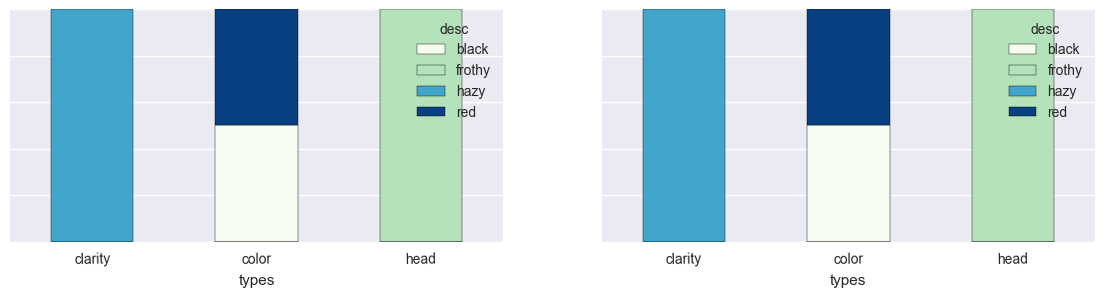

In [69]:
colors = plt.cm.GnBu(np.linspace(0, 1, 5))

plt.figure(figsize=(14,3))
ax1 = plt.subplot(1, 2, 1)
fp.plot(kind='bar', stacked=True,rot=1,ax=ax1, colormap="GnBu")
plt.setp(ax1.get_yticklabels(),visible=False)
ax1.tick_params(axis='y', which='both', length=0)

ax2 = plt.subplot(1, 2, 2)
fp.plot(kind='bar', stacked=True,rot=1,ax=ax2, colormap="GnBu")
plt.setp(ax2.get_yticklabels(),visible=False)
ax2.tick_params(axis='y', which='both', length=0)

# try with bokeh

In [47]:
tt = beer_desc.pivot_table(values='score', index='desc', columns='sens', fill_value=0)
tt = tt.div(tt.sum())
tt = tt.reset_index()
tt

sens,desc,sight,smell,taste,touchfeel
0,amber,0.176471,0.0,0.000000,0.000000
1,bitter,0.000000,0.0,0.571429,0.000000
2,brown,0.176471,0.0,0.000000,0.000000
3,caramel,0.176471,0.6,0.428571,0.000000
4,creamy,0.000000,0.0,0.000000,0.500000
5,dark,0.176471,0.0,0.000000,0.000000
6,hazy,0.176471,0.0,0.000000,0.000000
7,light,0.000000,0.0,0.000000,0.333333
8,oily,0.000000,0.0,0.000000,0.166667
9,white,0.117647,0.4,0.000000,0.000000


In [51]:
tt.

,sens,level_1,0
0,desc,0,amber
1,desc,1,bitter
2,desc,2,brown
3,desc,3,caramel
4,desc,4,creamy
5,desc,5,dark
6,desc,6,hazy
7,desc,7,light
8,desc,8,oily
9,desc,9,white


In [42]:
tt.index.to_series()

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [43]:
from bokeh.io import output_notebook
#output_notebook()

In [44]:
from collections import OrderedDict
from math import log, sqrt

sens_color = OrderedDict([("sight","#0d3362"),("smell", "#c64737"),("taste","#35B778"),("touchfeel", "#4292c6")])

In [45]:
width = 800
height = 800
inner_radius = 130 # legend place circle
outer_radius = 200

minr = sqrt(log(100* 1E4))
#minr = 0
maxr = sqrt(log(0.0001 * 1E4))
#maxr = 1
a = (outer_radius - inner_radius) / (minr - maxr)
b = inner_radius - a * maxr

def rad(mic):
    return a * np.sqrt(mic * 1E2) + b

big_angle = 2.0 * np.pi / (len(tt)) # number of slice
small_angle = big_angle / 10 #number of bars per slice

In [46]:
from bokeh.plotting import figure, show, output_file

p = figure(plot_width=width, plot_height=height, title="Description of " + test_mc0_name +" in 10 words",
    x_axis_type=None, y_axis_type=None,
    x_range=(-420, 420), y_range=(-420, 420),
    min_border=0,
    background_fill_color="white",
    toolbar_sticky=False)


p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

angles = np.pi/2 - big_angle/2 - tt.index.to_series()*big_angle


# small wedges
p.annular_wedge(0, 0, inner_radius, rad(tt.sight),
                -big_angle+angles+7*small_angle, -big_angle+angles+8*small_angle,
                color=sens_color['sight'])
p.annular_wedge(0, 0, inner_radius, rad(tt.smell),
                -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
                color=sens_color['smell'])
p.annular_wedge(0, 0, inner_radius, rad(tt.taste),
                -big_angle+angles+3*small_angle, -big_angle+angles+4*small_angle,
                color=sens_color['taste'])
p.annular_wedge(0, 0, inner_radius, rad(tt.touchfeel),
                -big_angle+angles+1*small_angle, -big_angle+angles+2*small_angle,
                color=sens_color['touchfeel'])

# circular axes and lables
#labels = np.power(10.0, np.arange(-1, 1))
labels = np.array([0.25,0.5,0.75,1])
radii = a * np.sqrt(labels * 1E2) + b
p.circle(0, 0, radius=radii, fill_color=None, line_color="gray")
p.text(0, radii[:-1], [str(r) for r in labels[:-1]],
       text_font_size="8pt", text_align="center", text_baseline="middle")

# radial axes
p.annular_wedge(0, 0, inner_radius-10, outer_radius*1.5,
                -big_angle+angles, -big_angle+angles, color="gray")

# desc labels
xr = (inner_radius-40)*np.cos(np.array(-big_angle/2 + angles))
yr = (inner_radius-40)*np.sin(np.array(-big_angle/2 + angles))
label_angle=np.array(-big_angle/2+angles)
label_angle[label_angle < -np.pi/2] += np.pi # easier to read labels on the left side
p.text(xr, yr, tt.desc, angle=label_angle,
       text_font_size="10pt", text_align="center", text_baseline="middle")

# OK, these hand drawn legends are pretty clunky, will be improved in future release

p.rect([-20, -20, -20,-20], [25, 7, -9,-27], width=30, height=13,
       color=list(sens_color.values()))
p.text([0, 0, 0,0], [25, 7, -9,-27], text=list(sens_color),
       text_font_size="9pt", text_align="left", text_baseline="middle")

#output_file("test2.html", title="test example")

show(p)

INFO:bokeh.core.state:Session output file 'test.html' already exists, will be overwritten.


In [757]:
radii[0]

277.9718896591138

In [731]:
angles

0    1.256637
1    0.628319
2    0.000000
3   -0.628319
4   -1.256637
5   -1.884956
6   -2.513274
7   -3.141593
8   -3.769911
9   -4.398230
dtype: float64

In [693]:
radii

array([ 136.7928201 ,  156.17504081,  171.04754184,  183.5856402 ])

# antibiotics = """
bacteria,                        penicillin, streptomycin, neomycin, gram
Mycobacterium tuberculosis,      800,        5,            2,        negative
Salmonella schottmuelleri,       10,         0.8,          0.09,     negative
Proteus vulgaris,                3,          0.1,          0.1,      negative
Klebsiella pneumoniae,           850,        1.2,          1,        negative
Brucella abortus,                1,          2,            0.02,     negative
Pseudomonas aeruginosa,          850,        2,            0.4,      negative
Escherichia coli,                100,        0.4,          0.1,      negative
Salmonella (Eberthella) typhosa, 1,          0.4,          0.008,    negative
Aerobacter aerogenes,            870,        1,            1.6,      negative
Brucella antracis,               0.001,      0.01,         0.007,    positive
Streptococcus fecalis,           1,          1,            0.1,      positive
Staphylococcus aureus,           0.03,       0.03,         0.001,    positive
Staphylococcus albus,            0.007,      0.1,          0.001,    positive
Streptococcus hemolyticus,       0.001,      14,           10,       positive
Streptococcus viridans,          0.005,      10,           40,       positive
Diplococcus pneumoniae,          0.005,      11,           10,       positive
"""

In [381]:
from six.moves import cStringIO as StringIO

In [382]:
df = pd.read_csv(StringIO(antibiotics),
                 skiprows=1,
                 skipinitialspace=True,
                 engine='python')

In [386]:
type(df.penicillin[0])

numpy.float64

In [395]:
df.index.to_series()

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
dtype: int64

In [396]:
df

,bacteria,penicillin,streptomycin,neomycin,gram
0,Mycobacterium tuberculosis,800.000,5.00,2.000,negative
1,Salmonella schottmuelleri,10.000,0.80,0.090,negative
2,Proteus vulgaris,3.000,0.10,0.100,negative
3,Klebsiella pneumoniae,850.000,1.20,1.000,negative
4,Brucella abortus,1.000,2.00,0.020,negative
5,Pseudomonas aeruginosa,850.000,2.00,0.400,negative
6,Escherichia coli,100.000,0.40,0.100,negative
7,Salmonella (Eberthella) typhosa,1.000,0.40,0.008,negative
8,Aerobacter aerogenes,870.000,1.00,1.600,negative
9,Brucella antracis,0.001,0.01,0.007,positive
